<a href="https://colab.research.google.com/github/JabborovRoboCoder/Determining_the_price_of_houses_in_Tashkent/blob/main/toshkent_sh__uy_narxlari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

In [432]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

In [433]:
df.shape

(7565, 7)

In [434]:
df.isnull().sum()

location      0
district      0
rooms         0
size          0
level         0
max_levels    0
price         0
dtype: int64

In [435]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [436]:
df.describe()

,rooms,level,max_levels
count,7565.000000,7565.000000,7565.000000
mean,2.625644,3.699273,6.038202
std,1.085201,2.237275,2.613271
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,5.000000
75%,3.000000,5.000000,9.000000
max,10.000000,19.000000,25.000000


In [437]:
df['size'].unique()

array(['57', '52', '42', '65', '70', '28', '30', '32', '51', '67', '35',
       '43', '90', '80', '69', '96', '76', '45', '27', '64', '26', '72',
       '100', '63', '48', '102', '78', '34', '56', '98', '93', '60', '82',
       '120', '110', '95', '68', '46', '40', '53', '54', '20', '50', '36',
       '58', '74', '94', '85', '125', '64.67', '22', '66', '37', '61',
       '69.65', '88', '38', '55.13', '91', '111', '107', '62', '40.41',
       '75', '84', '117', '47', '33', '187', '29', '11', '122', '119',
       '164', '92', '55', '89', '208', '44', '86', '150', '56.10', '83',
       '49', '142', '115', '350', '81', '89.55', '59', '145', '116', '77',
       '24', '41', '255', '266', '210', '55.62', '140', '141', '60.94',
       '165', '215', '66.82', '128', '97', '130', '105', '137', '47.14',
       '71', '160', '118', '152', '21', '104', '180', '109', '135', '73',
       '39', '39.11', '157', '112', '93.22', '106', '214', '235', '16',
       '300', '57.95', '79', '5', '53.06', '62.50',

In [438]:
df[df["size"].str.contains("Площадьземли:1сот", na=False)]

,location,district,rooms,size,level,max_levels,price
5347,"город Ташкент, Яшнободский район, Дархон",Яшнободский,4,Площадьземли:1сот,3,5,150000


In [439]:
df = df.drop(5347)
df = df.drop('location',axis=1)

In [443]:
df['size']=df['size'].astype("float64")

In [444]:
df['district'].unique()

array(['Юнусабадский', 'Яккасарайский', 'Чиланзарский', 'Учтепинский',
       'Мирзо-Улугбекский', 'Яшнободский', 'Мирабадский',
       'Шайхантахурский', 'Олмазорский', 'Сергелийский', 'Янгихаётский',
       'Бектемирский'], dtype=object)

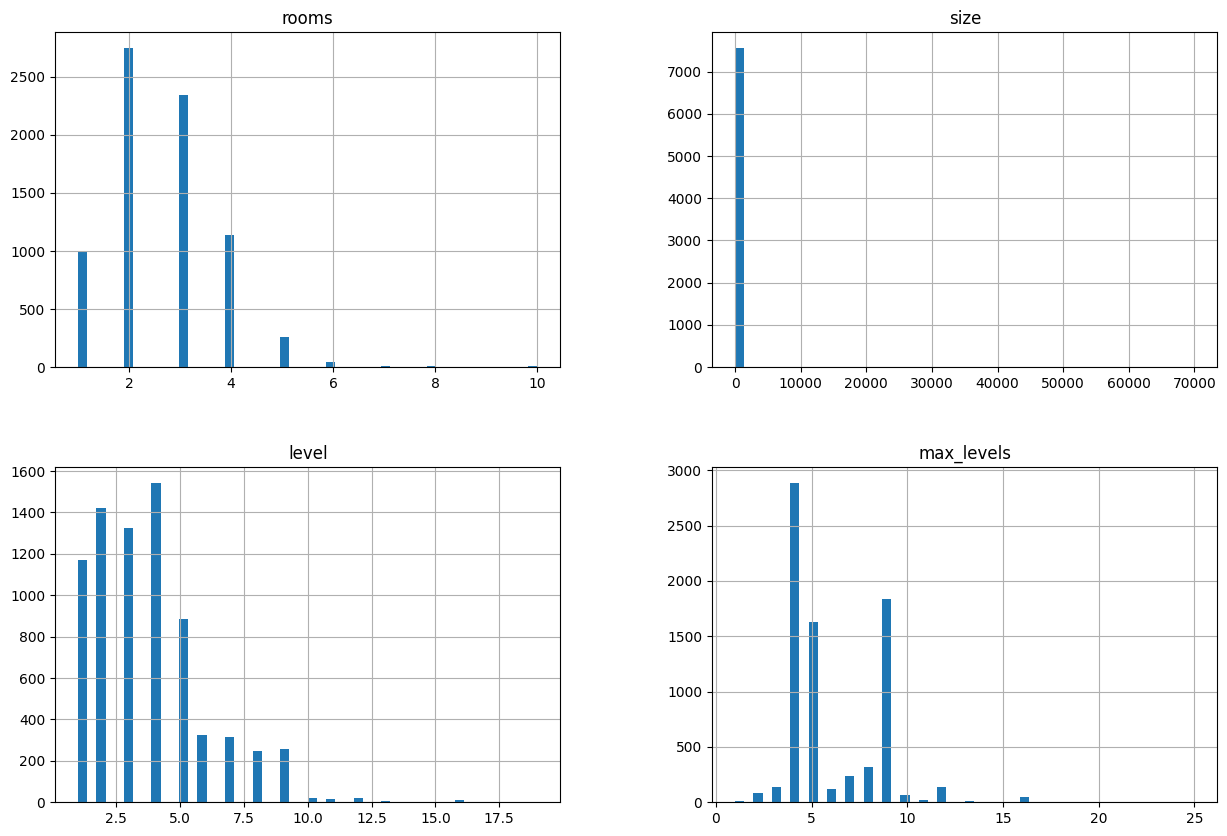

In [445]:
%matplotlib inline
df.hist(bins=50 , figsize=(15,10))
plt.show()

In [446]:
df = df.drop(df.loc[df["price"] == "Договорная"].index)
df['price'] = df['price'].astype('float64')

In [447]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7465 entries, 0 to 7564
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   district    7465 non-null   object 
 1   rooms       7465 non-null   int64  
 2   size        7465 non-null   float64
 3   level       7465 non-null   int64  
 4   max_levels  7465 non-null   int64  
 5   price       7465 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 408.2+ KB


In [448]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(df,test_size=0.2,random_state=42)

x_train = train_set.drop("price",axis=1)
y= train_set["price"].copy()
x_num = x_train.drop(['district'],axis=1)

In [449]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

num_pipline = Pipeline([
    ('std_scaler',StandardScaler()),
    ('imputer',SimpleImputer(strategy='median'))
])

from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline


num_attribs =list(x_num)
cat_attribs = ['district']

full_pipeline = ColumnTransformer([
    ('num',num_pipline,num_attribs),
    ('cat',OneHotEncoder(),cat_attribs)
])

In [450]:
x_prepared = full_pipeline.fit_transform(x_train)

Linear Regression algoritm

In [451]:

from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_prepared,y)

LinearRegression()

In [452]:
test_data = x_train.sample(10)
test_data

,district,rooms,size,level,max_levels
4053,Мирзо-Улугбекский,2,4.0,1,3
5520,Чиланзарский,2,60.0,3,4
4389,Мирзо-Улугбекский,1,30.0,2,4
7505,Учтепинский,1,18.0,3,4
1819,Учтепинский,3,65.0,4,4
2802,Учтепинский,5,150.0,6,9
3740,Учтепинский,1,42.0,2,4
6066,Мирабадский,2,40.0,1,1
4337,Мирабадский,3,5.0,4,5
2953,Мирабадский,4,112.0,4,9


In [453]:
test_label = y.loc[test_data.index]
test_label

4053     26000.0
5520     39000.0
4389     27300.0
7505     16000.0
1819     44500.0
2802    108000.0
3740     25700.0
6066     26000.0
4337     46600.0
2953     87000.0
Name: price, dtype: float64

In [454]:
test_data_prepared = full_pipeline.transform(test_data)

In [455]:
predicted_data = lr_model.predict(test_data_prepared)

In [456]:
pd.DataFrame({'Prognoz':predicted_data,"Real_baxosi":test_label})

,Prognoz,Real_baxosi
4053,43430.342309,26000.0
5520,37421.041411,39000.0
4389,20550.965539,27300.0
7505,3308.906499,16000.0
1819,46535.652615,44500.0
2802,101268.244182,108000.0
3740,6059.622638,25700.0
6066,65988.154578,26000.0
4337,92124.223653,46600.0
2953,126520.827912,87000.0


In [457]:
test_set

,district,rooms,size,level,max_levels,price
2301,Яшнободский,3,86.0,4,9,89000.0
6126,Учтепинский,3,70.0,2,5,43500.0
2149,Яккасарайский,3,90.0,5,5,45000.0
5594,Чиланзарский,1,36.0,2,4,24700.0
6566,Учтепинский,4,100.0,1,4,87000.0
...,...,...,...,...,...,...
6593,Шайхантахурский,3,80.0,6,9,48000.0
4089,Шайхантахурский,6,500.0,2,2,1800.0
441,Чиланзарский,1,36.0,2,5,28500.0
5639,Шайхантахурский,3,70.0,6,7,60000.0


In [458]:
x_test = test_set.drop('price',axis=1)
x_test

,district,rooms,size,level,max_levels
2301,Яшнободский,3,86.0,4,9
6126,Учтепинский,3,70.0,2,5
2149,Яккасарайский,3,90.0,5,5
5594,Чиланзарский,1,36.0,2,4
6566,Учтепинский,4,100.0,1,4
...,...,...,...,...,...
6593,Шайхантахурский,3,80.0,6,9
4089,Шайхантахурский,6,500.0,2,2
441,Чиланзарский,1,36.0,2,5
5639,Шайхантахурский,3,70.0,6,7


In [459]:
y_test = test_set["price"].copy()
y_test

2301    89000.0
6126    43500.0
2149    45000.0
5594    24700.0
6566    87000.0
         ...   
6593    48000.0
4089     1800.0
441     28500.0
5639    60000.0
2538    42000.0
Name: price, Length: 1493, dtype: float64

In [460]:
x_test_prepared = full_pipeline.transform(x_test)

In [461]:
y_predicted = lr_model.predict(x_test_prepared)

In [462]:
#RMSE
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_test,y_predicted)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

1366742.755611274


In [463]:
# Decision Tree Algoritmi

from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()
tree_model.fit(x_prepared,y)

DecisionTreeRegressor()

In [464]:
y_predicted = tree_model.predict(x_test_prepared)

In [465]:
# RMSE

lin_mse = mean_squared_error(y_test,y_predicted)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

1370279.744362157


In [466]:
# RandomForest Algoritmi

from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(x_prepared,y)

RandomForestRegressor()

In [467]:
# RMSE
y_predicted = rf_model.predict(x_test_prepared)
lin_mse = mean_squared_error(y_test,y_predicted)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

1370474.5078351125


Cross-Validation

In [470]:
X = df.drop("price", axis=1)
y = df["price"].copy()

X_prepared = full_pipeline.transform(X)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std.dev:", scores.std())

In [471]:
from sklearn.model_selection import cross_val_score

In [475]:
#lr_model
scores = cross_val_score(lr_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
lr_rmse_scores = np.sqrt(-scores)

In [476]:
display_scores(lr_rmse_scores)

Scores: [  72555.73963232   46818.73106055  144429.71285792   42474.71976401
   48253.58258335   43527.84943424   52085.7886351  1901388.20302356
  166777.44610516  650092.90111387]
Mean: 316840.4674210096
Std.dev: 556676.7608983462


In [479]:
#tree_model
scores = cross_val_score(tree_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [  63914.73211133  633175.93225028  141550.62576729  208136.27583923
  286911.12252325   60542.04463989  568481.16447018 1907804.32046469
  289715.10575773  645040.458062  ]
Mean: 480527.1781885858
Std.dev: 520401.18940460257


In [481]:
#rf_model
scores = cross_val_score(rf_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [  76464.25870922  145579.30986375  366829.44447244   64141.53491758
  176039.7330486   270135.36969958   84425.77345133 1903244.81762698
  219161.32781938  649066.42962108]
Mean: 395508.79992299265
Std.dev: 529546.6512293881


In [484]:
import joblib

filename = 'model.jbl'
joblib.dump(rf_model, filename)

['model.jbl']

In [485]:
model = joblib.load(filename)

In [486]:
scores = cross_val_score(model, X_prepared, y, scoring="neg_mean_squared_error", cv=5)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [ 115887.57851293  253489.24682662  201422.50138756 1349746.84128536
  492851.20705502]
Mean: 482679.4750134968
Std.dev: 451238.1240618786


In [487]:
filename = 'pipeline.jbl'
joblib.dump(full_pipeline, filename)

['pipeline.jbl']